      Date  Value  Anomaly
66  202011   49.9      3.9
67  202111   48.4      2.4
68  202211   43.8     -2.2
69  202311   46.7      0.7
70  202411   49.4      3.4
     Date  Temperature  Anomaly
0  195411         49.6      3.6
1  195511         41.2     -4.8
2  195611         44.2     -1.8
int64
   Date  Temperature  Anomaly
0  1954         49.6      3.6
1  1955         41.2     -4.8
2  1956         44.2     -1.8
0.03945338698859825 -33.08123742454727
The predicted temperature for january 2025 is :  46.81187122736419


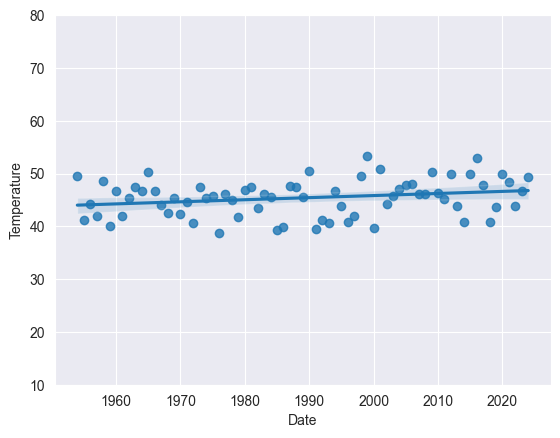

Axes(0.125,0.11;0.775x0.77)


In [16]:
from statistics import linear_regression

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

"""Y = mx+b where y is predicted value, x is independent value, y is dependent
b is line intercept with y axis when x = 0, m is a slope
data obtained from:https://www.ncei.noaa.gov/access/monitoring/climate-at-a-glance/city/time-series
data is from wichita kansas city"""
wichita = pd.read_csv('data.csv', comment='#')
#print(wichita.head())
print(wichita.tail())
#clean data by changing value to temperature
wichita.columns = ['Date', 'Temperature', 'Anomaly']
print(wichita.head(3)) #give the first three records
#getting the type of data stored in date
print(wichita.Date.dtype)
#perform floor division each value in column Date
wichita.Date = wichita.Date.floordiv(100)
print(wichita.head(3))
pd.set_option('display.precision',2)
wichita.Temperature.describe() #calculate the statistics of temperature
#Draw a regression line
linear_line = stats.linregress(x=wichita.Date, y=wichita['Temperature'])
#print the slop and intercept
print(linear_line.slope, linear_line.intercept)
#predicting the temperature of wichita in 2025
predicted_temperature = linear_line.intercept + linear_line.slope*2025
print("The predicted temperature for january 2025 is : ",predicted_temperature)
sns.set_style('darkgrid')
#display the plotted regression line
axes = sns.regplot(x=wichita.Date, y=wichita['Temperature'])
axes.set_ylim([10,80])
plt.show()
print(axes)
